In [1]:
import sys
sys.path.append('..')

from olfactory_navigation import Environment, Agent
from olfactory_navigation.agents import FSVI_Agent
from olfactory_navigation.simulation import run_test, SimulationHistory
from olfactory_navigation.test_setups import run_all_starts_test

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import cupy as cp

In [2]:
from cupy.cuda import runtime as cuda_runtime
cuda_runtime.setDevice(0)

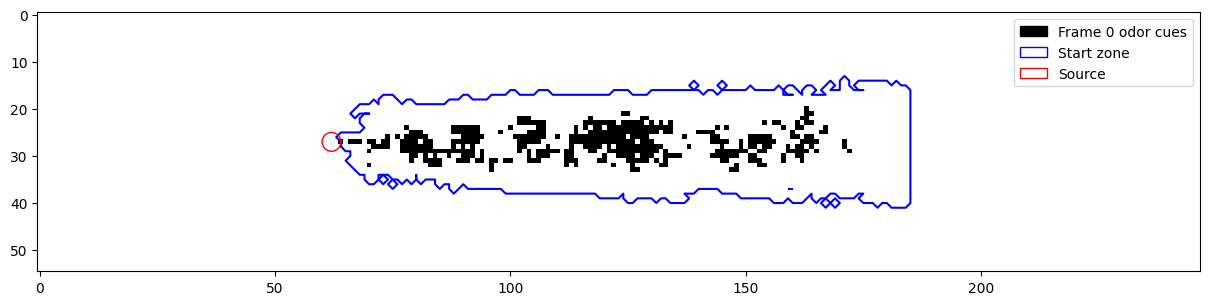

In [3]:
# data_path = "/storage/rando/data/nose_data_27_123.npy" # INSERT YOUR PATH
data_path = "G:\\My Drive\\Documents\\Universita di Genova\\Pimlb work\\nose_data_27_123.npy"

env = Environment(data_file=data_path,
                  data_source_position=[13, 0],
                  source_radius=2,
                  margins=[14, 62],
                  boundary_condition='wrap_vertical',
                  start_zone='odor_present',
                  odor_present_threshold=3e-6)

env.plot()

In [4]:
from olfactory_navigation.agents.model_based_util.environment_converter import minimal_converter

In [5]:
ag = FSVI_Agent(env, environment_converter=minimal_converter, partitions=[3,10])

In [6]:
_ = ag.train(expansions=100, force=True, use_gpu=True)

[07/17/2024, 23:41:29] MDP_policy, not provided. Solving MDP with Value Iteration...
[07/17/2024, 23:41:29] Sending Model to GPU...
[07/17/2024, 23:41:30]     > Done in 0.996s


  0%|          | 0/1000 [00:00<?, ?it/s]

Summary of Value Iteration run
  - Model: 65-state, 4-action
  - Converged in 862 iterations and 3.7431 seconds
  - Took on average 0.0043s per iteration


Expansions:   0%|          | 0/100 [00:00<?, ?it/s]

Summary of Point Based Value Iteration run
  - Model: 65 state, 4 action, 3 observations
  - Converged or stopped after 100 expansion steps and 100 backup steps.
  - Resulting value function has 348 alpha vectors.
  - Converged in 13.1819s

  - Expand function took on average 0.0948s and yielded on average 182.68 beliefs per iteration. (0.0068s/it/belief)
  - Backup function took on average 0.0370s and yielded on average 3.44 alpha vectors per iteration. (0.0056s/it/alpha)
  - Pruning function took on average 0.0000s and yielded on average prunings of 0.00 alpha vectors per iteration.


[Warning] 'as_grid' parameter set to False but state count is >3 so it will be plotted as a grid


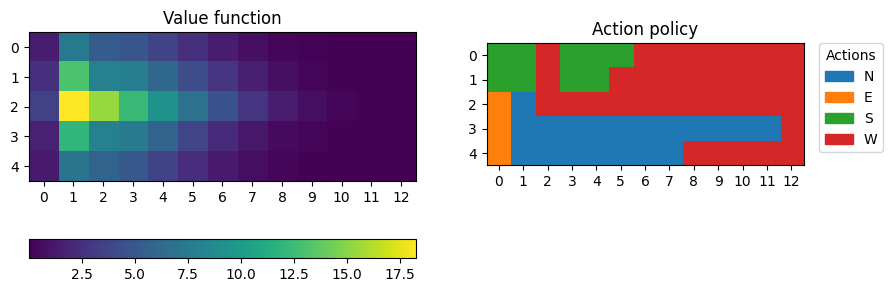

In [7]:
ag.value_function.plot()

In [8]:
hist = run_all_starts_test(ag, use_gpu=True)


  0%|          | 0/1000 [00:00<?, ?it/s]

Simulations done in 16.960s:
Simulations reached goal: 2264/2393 (129 failures (reached horizon: 129)) (94.61% success)
 - Average step count:                 357.354 +- 304.51 (Successfull only: 320.736 +- 270.49)
 - Extra steps:                        286.320 +- 288.61 (Successful only: 252.183 +- 257.76)
 - Average discounted rewards (ADR):   0.235 +- 0.29 (Successfull only: 0.248 +- 0.29)
 - Tmin/T:                             0.472 +- 0.40 (Successful only: 0.493 +- 0.40)


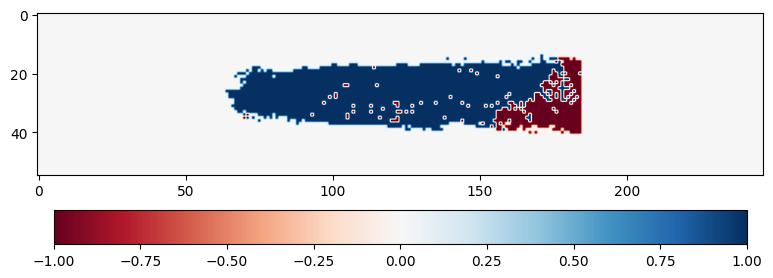

In [9]:
start_points_grid = np.zeros(env.shape)

failed_points = hist.start_points[hist.done_at_step == -1]
success_points = hist.start_points[hist.done_at_step != -1]

start_points_grid[failed_points[:,0], failed_points[:,1]] = -1
start_points_grid[success_points[:,0], success_points[:,1]] = 1

plt.figure(figsize=(10,3))
plt.imshow(start_points_grid, cmap='RdBu')
plt.colorbar(orientation='horizontal')

In [9]:
np.where(hist.done_at_step == -1)[0][:10]

array([ 67, 230, 262, 274, 384, 388, 391, 505, 666, 709], dtype=int64)

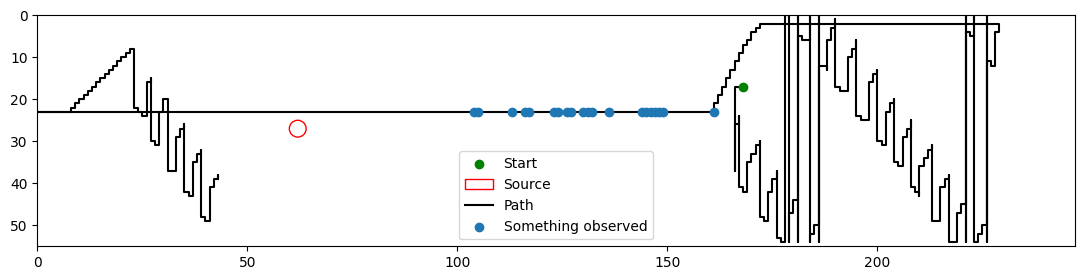

In [10]:
hist.plot(67)